# TO DO LIST: 
* [x] Practice graph of class 3 (point and bars), change aspect and use seaborn
* [x] Explore some random datasets
  - [x]  Practice boxplots and plots for variable distributions
  - [x]  How can I put two graph on a same cell result?
* [ ] Repeat Class 4 am exercise with normalized price.
* [ ] Practice Regression graphs (Class 4)
  - [ ]  Compare model fit on train and test data)
  - [ ]  How can I make a y vs X_i graph and showcast the model fit?
  - [ ]  Are there any graph I could use for a logistic regression?

# ASK 
- I cannot apply normalization to an encoded matrix

# First of all 
Author: María Briones 

Date: 19-02-2026

## Libraries

<!--add if necesary: ## Function definition--> 

In [1]:
import numpy as np #for arrays and mathematical functions
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #complement to matplotlib
import pandas as pd #data structure and manipulation.
from sklearn.model_selection import train_test_split #for ML
from sklearn.compose import ColumnTransformer #to encode process
from sklearn.preprocessing import OneHotEncoder #to encode process
from sklearn.preprocessing import MinMaxScaler #to normalize wirth min-max method

# Numpy, MatPlotlib and Seaborn

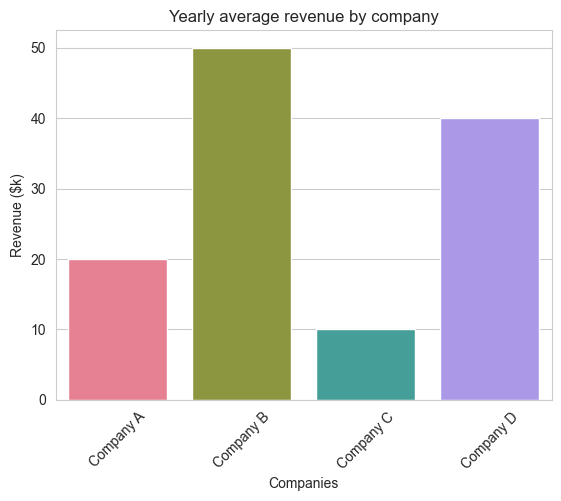

In [111]:
#chose a style for the plot
#chosen color palete 
pal = sns.color_palette("husl", 4) #this is a qualitative palette and we chose the first 4 colors

#create arrays
categories = ['Company A', 'Company B', 'Company C', 'Company D']
values = [20, 50, 10, 40]

#if we want to specify colors
colors = ["green", "blue", "red", "purple"]

#plot bar x against y 
sns.barplot(x=categories, y=values, hue=categories, palette=pal, fill=True, legend=False)#, color=colors)

#costumize the plot
plt.title("Yearly average revenue by company")
plt.xlabel("Companies")
plt.ylabel("Revenue ($k)")
plt.xticks(rotation=45) # Rotate x axis names for better readability

#display the plot
plt.show()

# Data exploring

In [2]:
#import the dataset of car prices
cars= pd.read_csv('../data/automobile_prices.csv')
print(type(cars))
cars.head()

<class 'pandas.DataFrame'>


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,ferrari,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,113495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
2,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
3,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
4,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950


In [3]:
# explore the ds
print(f"Cars dataframe contains {cars.shape[0]} rows (observations) and {cars.shape[1]} features including price.")
cars.info()

Cars dataframe contains 206 rows (observations) and 26 features including price.
<class 'pandas.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          206 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               206 non-null    str    
 3   fuel-type          206 non-null    str    
 4   aspiration         206 non-null    str    
 5   num-of-doors       204 non-null    str    
 6   body-style         206 non-null    str    
 7   drive-wheels       206 non-null    str    
 8   engine-location    206 non-null    str    
 9   wheel-base         206 non-null    float64
 10  length             206 non-null    float64
 11  width              206 non-null    float64
 12  height             206 non-null    float64
 13  curb-weight        206 non-null    int64  
 14  engine-type        206 non-null    str    
 15  num-

We can see that 'normalized-losses' have 42 (206-164) missing values, 'bore' and 'stroke' have 4 NaN values,  while 'num-of-doors', 'horsepower' and 'peak-rpm' have 2. 

## Price distribution

We want to explore the distribution of **price**. 

### Histogram

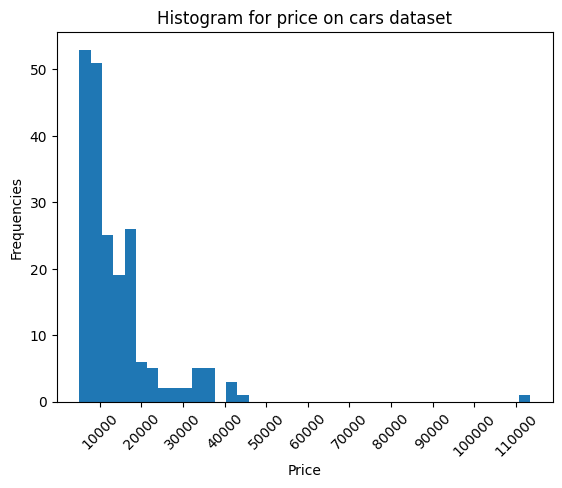

In [4]:
# Basic histogram 
#plt.hist?

#generate plot 
plt.hist(cars['price'], #data
        bins=40 #number of bars, the default is 10
        )

#costumize the plot
plt.title("Histogram for price on cars dataset")
plt.xlabel("Price")
plt.ylabel("Frequencies")
plt.xticks(np.arange(10000, max(cars['price'])+4000, 10000), rotation=45)
#plt.xticks(rotation=45) # Rotate x axis names for better readability

#display the plot
plt.show()

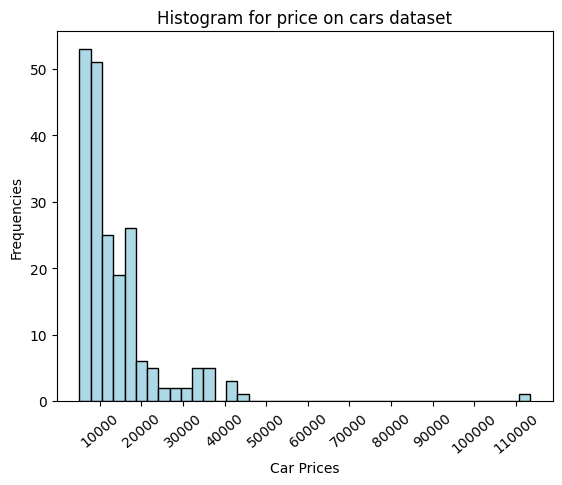

In [5]:
# more complex histogram using fig, ax, subplot
style = {'facecolor': 'lightblue', 'edgecolor': 'black', 'linewidth': 1}

#this gives the plane on which we will plot
fig, ax = plt.subplots()

#actually plot something interesting
ax.hist(cars['price'], #data
        bins=40, #number of bars
        **style #we quote the style defines earlier
       )

# plot the xdata locations on the x axis:
#ax.plot(cars['price'], 0*cars['price'], 'd')
ax.set_ylabel('Frequencies')
ax.set_xlabel('Car Prices')
ax.set_title("Histogram for price on cars dataset")
ax.set_xticks(np.arange(10000, max(cars['price'])+4000, 10000)) #longitud de los intervalos en el eje x 
ax.tick_params(axis='x', labelrotation=40) #rotate the ticks

### Boxplot

In [6]:
#obtain the min statistics of the variable
cars['price'].describe()

count       206.000000
mean      13898.844660
std       10801.559552
min        5118.000000
25%        7790.750000
50%       10320.000000
75%       16512.000000
max      113495.000000
Name: price, dtype: float64

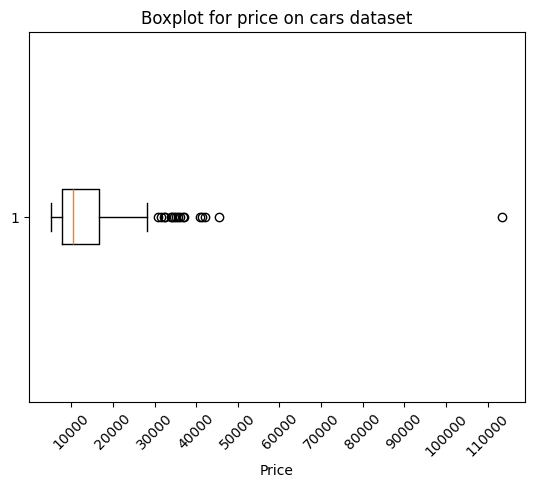

In [7]:
# plt.boxplot?

#generate plot 
plt.boxplot(cars['price'], #data
            orientation = 'horizontal'
        )

#costumize the plot
plt.title("Boxplot for price on cars dataset")
plt.xticks(np.arange(10000, max(cars['price'])+4000, 10000), rotation=45)
plt.xlabel("Price")
#plt.ylabel("Frequencies")

#display the plot
plt.show()

Seeing the histogram and watching the boxplot we can see than the 75% of the sample es below the price of 16,000 (aprox). The max without outliers rounds 30,000. Lets repeat the process but with a cleaned version of the database. 

In [8]:
# clean database
clean_cars = cars[cars["price"]<30000]

# Linear regression 
Repeat the excersise to predict car prices, exclude ferrari from the sample 

Text(0.5, 0, 'Price')

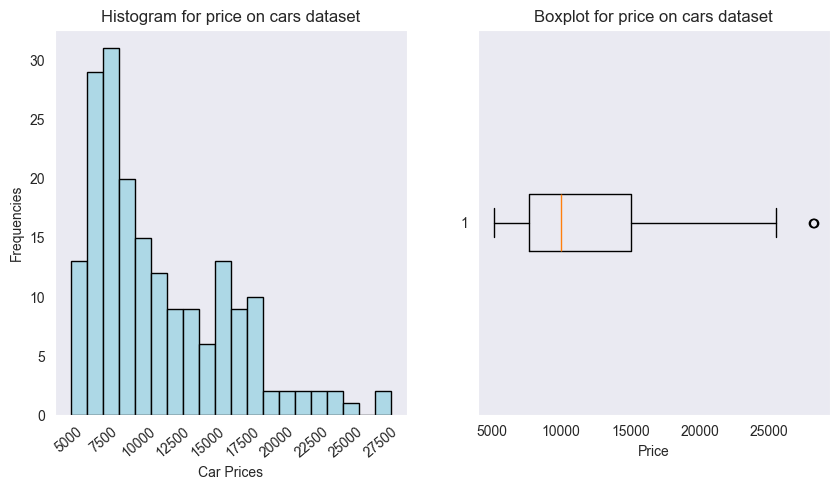

In [9]:
sns.set_style("dark")

#------------- Data Preprocess
#------a. cleaning

#exclude data
clean_cars = clean_cars[clean_cars["make"] != "ferrari"]

#To stack to plots horizontally 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# more complex histogram using fig, ax, subplot
style = {'facecolor': 'lightblue', 'edgecolor': 'black', 'linewidth': 1}

#actually plot something interesting
ax1.hist(clean_cars['price'], #data
        bins=20, #number of bars
        **style #we quote the style defines earlier
       )

# plot the xdata locations on the x axis:
#ax.plot(cars['price'], 0*cars['price'], 'd')
ax1.set_ylabel('Frequencies')
ax1.set_xlabel('Car Prices')
ax1.set_title("Histogram for price on cars dataset")
ax1.set_xticks(np.arange(5000, max(clean_cars['price'])+1000, 2500)) #longitud de los intervalos en el eje x 
ax1.tick_params(axis='x', labelrotation=40) #rotate the ticks

ax2.boxplot(clean_cars['price'], #data
            orientation = 'horizontal'
        )

#costumize the plot
ax2.set_title("Boxplot for price on cars dataset")
#ax2.set_xticks(np.arange(5000, max(clean_cars['price'])+1000, 2500), rotation=45)
ax2.set_xlabel("Price")
#plt.ylabel("Frequencies")

In [20]:
#------ Slicing
#NA exclusion 
clean_cars = clean_cars.dropna(subset=['horsepower', 'peak-rpm'])

#discard irrelevant features
clean_cars =clean_cars[["make", "body-style", "wheel-base", "engine-size", "horsepower", "peak-rpm", "highway-mpg", "price"]]

# dependent and independent variables
y = clean_cars["price"] #target
X = clean_cars.drop("price", axis=1) #features

In [32]:
#------ Encoding

#we identify the two non numerical columnds
cat_features = ['make', 'body-style']

#we apply the column transformer
transformer = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), cat_features)],
                               remainder='passthrough') # This specifies that all other columns should be kept

X_encoded = transformer.fit_transform(X)

In [33]:
#------ Slicing 2.0

#we create the four data sets, 2 for training and two for testing
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [30]:
#------ Normalization
scaler_x = MinMaxScaler() 
scaler_y = MinMaxScaler() #why?

X_train_s = scaler_x.fit_transform(X_train)
X_test_s = scaler_x.fit_transform(X_test)

y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.fit_transform(y_test)

ValueError: Expected a 2-dimensional container but got <class 'pandas.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [ ]:

#------------- Training the model

In [151]:
X.()

,make,body-style,wheel-base,engine-size,horsepower,peak-rpm,highway-mpg
1,alfa-romero,convertible,88.6,130,111.0,5000.0,27
2,alfa-romero,convertible,88.6,130,111.0,5000.0,27
3,alfa-romero,hatchback,94.5,152,154.0,5000.0,26
4,audi,sedan,99.8,109,102.0,5500.0,30
5,audi,sedan,99.4,136,115.0,5500.0,22


In [150]:
X_encoded[:1], pd.DataFrame(X_encoded).head()

(<Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 7 stored elements and shape (1, 30)>,
                                                    0
 0  <Compressed Sparse Row sparse matrix of dtype ...
 1  <Compressed Sparse Row sparse matrix of dtype ...
 2  <Compressed Sparse Row sparse matrix of dtype ...
 3  <Compressed Sparse Row sparse matrix of dtype ...
 4  <Compressed Sparse Row sparse matrix of dtype ...)